## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP_ = [0.1, 0.2, 0.3]
OPT_ = [keras.optimizers.SGD, \
        keras.optimizers.Adam]

In [7]:
OPT_[0] == keras.optimizers.SGD

True

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for Dropout_EXP in Dropout_EXP_:
    for optimizer in OPT_:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        #print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=Dropout_EXP)
        model.summary()
        #optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        #optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, amsgrad=False)
        if optimizer == keras.optimizers.SGD:
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], \
                          optimizer=optimizer(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM))
        else:
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], \
                          optimizer=optimizer(beta_1=0.9, beta_2=0.999, amsgrad=False))

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "dropout rate:{}".format(Dropout_EXP)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

Epoch 50/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0953 - acc: 0.6092 - val_loss: 1.2882 - val_acc: 0.5458
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____

Epoch 49/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.1555 - acc: 0.5850 - val_loss: 1.3318 - val_acc: 0.5308
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.1400 - acc: 0.5885 - val_loss: 1.3319 - val_acc: 0.5358
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0        

Epoch 48/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.2448 - acc: 0.5568 - val_loss: 1.3109 - val_acc: 0.5317
Epoch 49/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2367 - acc: 0.5572 - val_loss: 1.2967 - val_acc: 0.5361
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.2299 - acc: 0.5625 - val_loss: 1.2920 - val_acc: 0.5378
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131

Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4082 - acc: 0.4945 - val_loss: 1.4093 - val_acc: 0.4944
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4059 - acc: 0.4939 - val_loss: 1.4220 - val_acc: 0.4959
Epoch 49/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4067 - acc: 0.4962 - val_loss: 1.4002 - val_acc: 0.5026
Epoch 50/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4036 - acc: 0.4958 - val_loss: 1.4032 - val_acc: 0.5011
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)            

Epoch 46/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3755 - acc: 0.5084 - val_loss: 1.3443 - val_acc: 0.5168
Epoch 47/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.3664 - acc: 0.5118 - val_loss: 1.3520 - val_acc: 0.5124
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.3570 - acc: 0.5162 - val_loss: 1.3427 - val_acc: 0.5190
Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.3487 - acc: 0.5173 - val_loss: 1.3480 - val_acc: 0.5156
Epoch 50/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.3499 - acc: 0.5173 - val_loss: 1.3373 - val_acc: 0.5213
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)      

Epoch 45/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5717 - acc: 0.4335 - val_loss: 1.5267 - val_acc: 0.4649
Epoch 46/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5691 - acc: 0.4339 - val_loss: 1.5107 - val_acc: 0.4733
Epoch 47/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5769 - acc: 0.4319 - val_loss: 1.5198 - val_acc: 0.4696
Epoch 48/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5613 - acc: 0.4392 - val_loss: 1.5435 - val_acc: 0.4713
Epoch 49/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5608 - acc: 0.4387 - val_loss: 1.4940 - val_acc: 0.4769
Epoch 50/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5643 - acc: 0.4346 - val_loss: 1.5361 - val_acc: 0.4656


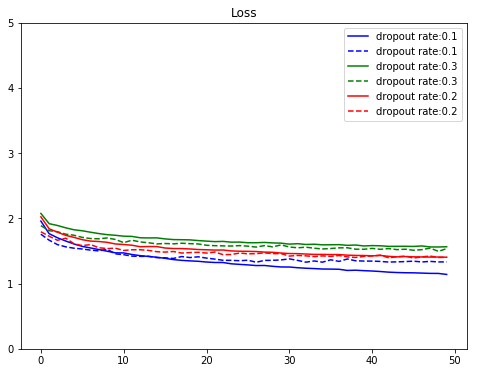

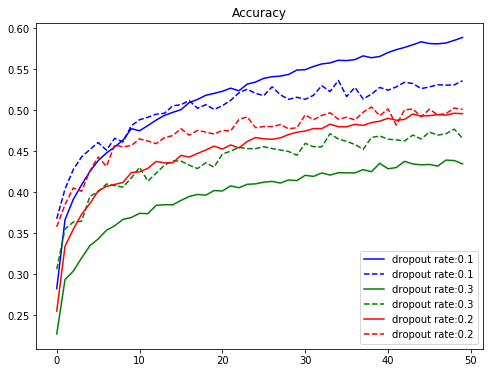

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["b", "g", "r"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()